In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# #이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,882 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

In [3]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


In [4]:
df = pd.read_csv('result_all.csv')

In [5]:
df = df[(df['변수선택법']!='error') & (df['적용모델']!='sgd')]

Text(0.5, 1.0, 'Accuracy')

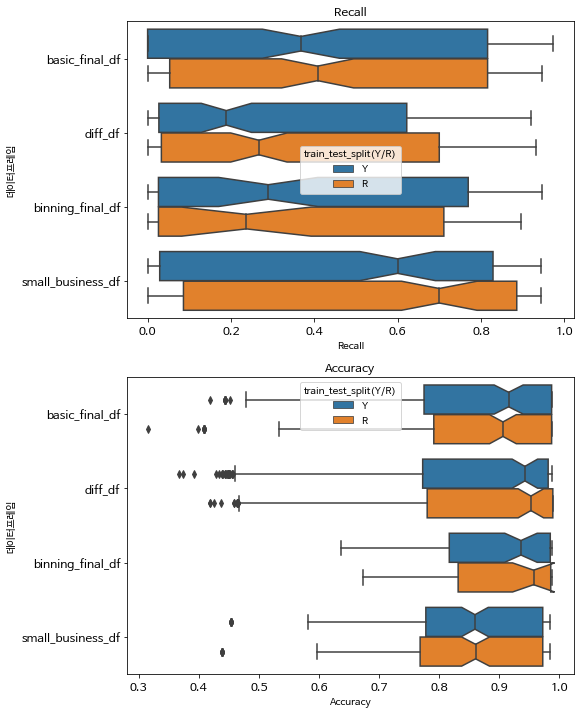

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(8,12))
#palette=['tomato','orange','seagreen','slateblue']
sns.boxplot(y = "데이터프레임", x = "Recall",hue = 'train_test_split(Y/R)', notch=True, data = df,ax = axes[0])
sns.boxplot(y = "데이터프레임", x = "Accuracy",hue = 'train_test_split(Y/R)', notch=True, data = df,ax = axes[1])
axes[0].set_title("Recall")
axes[1].set_title("Accuracy")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; y

Text(0.5, 1.0, 'Accuracy')

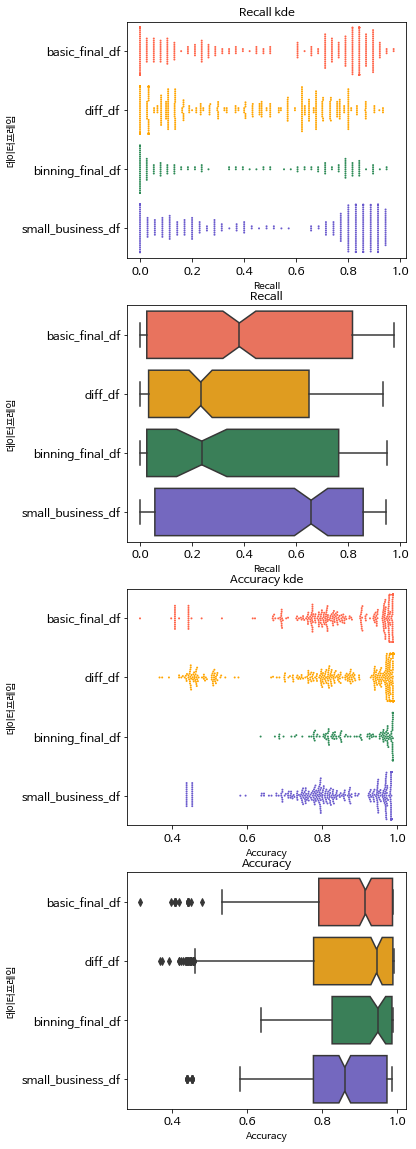

In [11]:
palette=['tomato','orange','seagreen','slateblue']
fig, axes = plt.subplots(4, 1, figsize=(5,20))
sns.swarmplot(y = "데이터프레임", x = "Recall", data = df, palette = palette,ax = axes[0], size=2)
sns.boxplot(y = "데이터프레임", x = "Recall", notch=True, data = df,palette = palette,ax = axes[1])
sns.swarmplot(y = "데이터프레임", x = "Accuracy", data = df,palette = palette,ax = axes[2], size=2)
sns.boxplot(y = "데이터프레임", x = "Accuracy", notch=True, data = df,palette = palette,ax = axes[3])
axes[0].set_title("Recall kde")
axes[1].set_title("Recall")
axes[2].set_title("Accuracy kde")
axes[3].set_title("Accuracy")

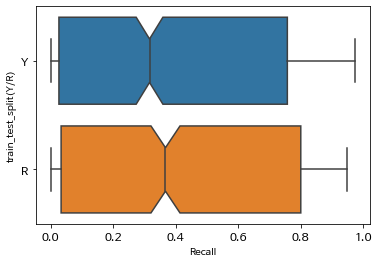

In [ ]:
sns.boxplot(y = "train_test_split(Y/R)", x = "Recall", notch=True,data = df)
plt.show()

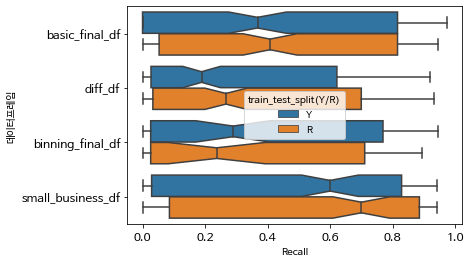

In [ ]:
sns.boxplot(y = "데이터프레임", x = "Recall",hue = 'train_test_split(Y/R)', notch=True, data = df)

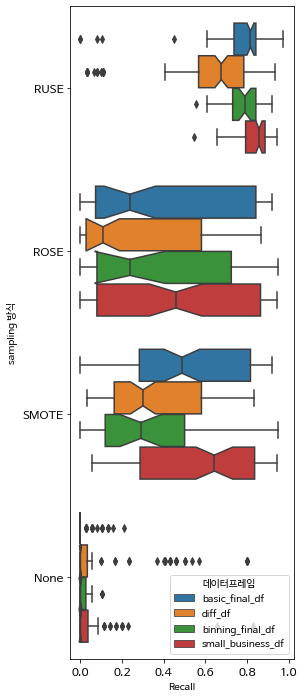

In [ ]:
plt.figure(figsize=(4,12))
sns.boxplot(y = "sampling 방식", x = "Recall",hue = '데이터프레임', notch=True, data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; y

Text(0.5, 1.0, 'Accuracy')

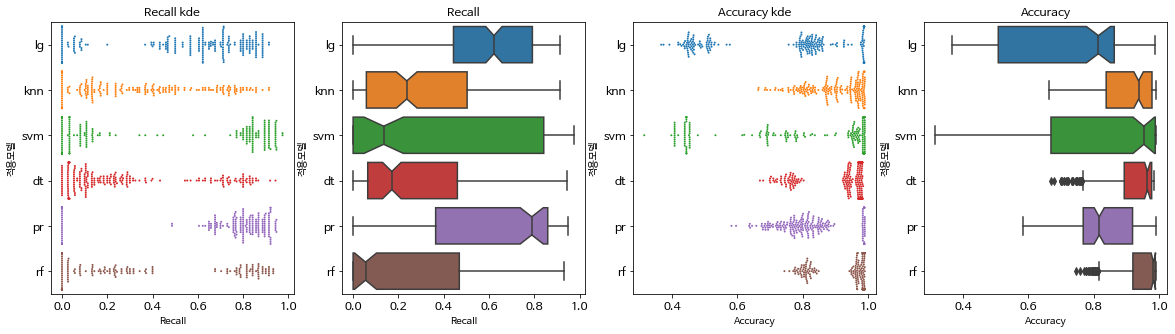

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
sns.swarmplot(y = "적용모델", x = "Recall", data = df,ax = axes[0], size=2)
sns.boxplot(y = "적용모델", x = "Recall", notch=True, data = df,ax = axes[1])
sns.swarmplot(y = "적용모델", x = "Accuracy", data = df,ax = axes[2], size=2)
sns.boxplot(y = "적용모델", x = "Accuracy", notch=True, data = df,ax = axes[3])
axes[0].set_title("Recall kde")
axes[1].set_title("Recall")
axes[2].set_title("Accuracy kde")
axes[3].set_title("Accuracy")

In [ ]:
# 위의 accuracy 분포는 상위 recall인것만 보여주기

In [ ]:
df.columns

Index(['데이터프레임', 'train_test_split(Y/R)', 't-test(Y/N)', '변수선택법', 'VIF(Y/N)',
       'sampling 방식', '적용모델', '선택된 변수', '혼동행렬', 'Accuracy', 'Precision',
       'Recall', 'F1-score', 'hyperparameter 변경'],
      dtype='object')

In [ ]:
df.groupby(['t-test(Y/N)', '변수선택법', 'VIF(Y/N)'])[['Recall']].describe().reset_index()

t-test(Y/N)     변수선택법 VIF(Y/N) Recall  ...                                 
                                  count  ...      25%     50%      75%    max
0         t_Y     Lasso      v_N  192.0  ...  0.02600  0.2630  0.79175  0.943
1         t_Y     Lasso      v_Y  144.0  ...  0.03200  0.3055  0.79175  0.943
2         t_Y      None      v_N  192.0  ...  0.02600  0.3375  0.78900  0.943
3         t_Y      None      v_Y  144.0  ...  0.02850  0.3710  0.81925  0.943
4         t_Y  backward      v_N   72.0  ...  0.03300  0.2805  0.65350  0.947
5         t_Y  backward      v_Y   48.0  ...  0.02025  0.1755  0.66925  0.833
6         t_Y   forward      v_N  144.0  ...  0.03200  0.3725  0.78900  0.974
7         t_Y   forward      v_Y  144.0  ...  0.03200  0.4140  0.80000  0.974
8         t_Y  stepwise      v_N  168.0  ...  0.03300  0.4000  0.80000  0.947
9         t_Y  stepwise      v_Y  144.0  ...  0.03300  0.4185  0.80000  0.943

[10 rows x 11 columns]

In [ ]:
target = pd.read_csv('target_92.csv')

,데이터프레임,train_test_split(Y/R),t-test(Y/N),변수선택법,VIF(Y/N),sampling 방식,적용모델,선택된 변수,혼동행렬,Accuracy,Precision,Recall,F1-score,hyperparameter 변경
0,small_business_df,R,t_Y,Lasso,v_N,SMOTE,lg,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본순이익률', '자기자본순...",[[1786 366]\n [ 3 32]],0.831,0.080,0.914,0.148,none
1,small_business_df,R,t_Y,forward,v_N,ROSE,lg,"['총자본사업이익률', '자기자본구성비율', '종업원수', '단기차입금 대 총차입금...",[[1778 374]\n [ 3 32]],0.828,0.079,0.914,0.145,none
2,small_business_df,R,t_Y,Lasso,v_Y,RUSE,rf,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본순이익률', '자기자본순...",[[1748 404]\n [ 3 32]],0.814,0.073,0.914,0.136,none
3,small_business_df,R,t_Y,forward,v_N,RUSE,lg,"['총자본사업이익률', '자기자본구성비율', '종업원수', '단기차입금 대 총차입금...",[[1819 333]\n [ 4 31]],0.846,0.085,0.886,0.155,none
4,small_business_df,R,t_Y,forward,v_N,SMOTE,lg,"['총자본사업이익률', '자기자본구성비율', '종업원수', '단기차입금 대 총차입금...",[[1802 350]\n [ 4 31]],0.838,0.081,0.886,0.149,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,binning_final_df,R,t_Y,Lasso,v_N,RUSE,rf,"['종업원1인당 부가가치증가율', '비유동자산증가율', '종업원1인당 인건비증가율'...",[[2651 593]\n [ 8 30]],0.817,0.048,0.789,0.091,none
88,binning_final_df,Y,t_Y,backward,v_N,ROSE,lg,"['비유동자산증가율', '총자본영업이익률', '경영자본순이익률', '자기자본배당률'...",[[2641 596]\n [ 8 30]],0.816,0.048,0.789,0.090,none
89,basic_final_df,Y,t_Y,forward,v_N,RUSE,rf,"['총자본사업이익률', '자기자본구성비율', '자본금회전률', 'CASH FLOW ...",[[2632 605]\n [ 8 30]],0.813,0.047,0.789,0.089,none
90,basic_final_df,R,t_Y,forward,v_N,SMOTE,lg,"['총자본사업이익률', '자기자본구성비율', '순운전자본회전률', '경영자본회전률'...",[[2635 609]\n [ 8 30]],0.812,0.047,0.789,0.089,none


In [ ]:
all_df = pd.read_csv('result_all.csv')

In [ ]:
all_df.loc[all_df['sampling 방식']=='SMOTE', 'sampling 방식'] = 'ROSE'
all_df = all_df[all_df['sampling 방식']!= 'None']

all_df.sort_values(by=['데이터프레임','train_test_split(Y/R)', 'sampling 방식'], ascending=False, inplace=True, ignore_index=True)
all_df.drop(['t-test(Y/N)','변수선택법','VIF(Y/N)','선택된 변수'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
by_recall = all_df
by_recall.sort_values(by=['데이터프레임','train_test_split(Y/R)', 'sampling 방식', 'Recall'], ascending=False, inplace=True)
by_recall.drop_duplicates(subset =['데이터프레임', 'train_test_split(Y/R)', 'sampling 방식'], keep='first')

,데이터프레임,train_test_split(Y/R),sampling 방식,적용모델,혼동행렬,Accuracy,Precision,Recall,F1-score,hyperparameter 변경
54,small_business_df,Y,RUSE,pr,[[1231 906]\n [ 2 33]],0.582,0.035,0.943,0.068,none
145,small_business_df,Y,ROSE,pr,[[1440 697]\n [ 2 33]],0.678,0.045,0.943,0.086,none
213,small_business_df,R,RUSE,svm,[[ 927 1225]\n [ 2 33]],0.439,0.026,0.943,0.051,none
344,small_business_df,R,ROSE,sgd,[[1513 639]\n [ 1 34]],0.707,0.051,0.971,0.096,none
431,diff_df,Y,RUSE,dt,[[2195 854]\n [ 3 34]],0.722,0.038,0.919,0.074,none
498,diff_df,Y,ROSE,sgd,[[ 391 2658]\n [ 2 35]],0.138,0.013,0.946,0.026,none
664,diff_df,R,RUSE,rf,[[2214 643]\n [ 2 28]],0.777,0.042,0.933,0.080,none
708,diff_df,R,ROSE,sgd,[[ 362 2495]\n [ 2 28]],0.135,0.011,0.933,0.022,none
869,binning_final_df,Y,RUSE,sgd,[[ 154 3083]\n [ 0 38]],0.059,0.012,1.000,0.024,none
922,binning_final_df,Y,ROSE,pr,[[2212 1025]\n [ 2 36]],0.686,0.034,0.947,0.066,none


In [ ]:
by_acc = all_df
by_acc.sort_values(by=['데이터프레임','train_test_split(Y/R)', 'sampling 방식', 'Accuracy'], ascending=False, inplace=True)
by_acc.drop_duplicates(subset =['데이터프레임', 'train_test_split(Y/R)', 'sampling 방식'], keep='first')

,데이터프레임,train_test_split(Y/R),sampling 방식,적용모델,혼동행렬,Accuracy,Precision,Recall,F1-score,hyperparameter 변경
29,small_business_df,Y,RUSE,sgd,[[1963 174]\n [ 24 11]],0.909,0.059,0.314,0.100,none
76,small_business_df,Y,ROSE,rf,[[2134 3]\n [ 35 0]],0.983,0.000,0.000,0.000,none
260,small_business_df,R,RUSE,sgd,[[2015 137]\n [ 20 15]],0.928,0.099,0.429,0.160,none
328,small_business_df,R,ROSE,rf,[[2150 2]\n [ 34 1]],0.984,0.333,0.029,0.053,none
430,diff_df,Y,RUSE,svm,[[3005 44]\n [ 34 3]],0.975,0.064,0.081,0.071,none
566,diff_df,Y,ROSE,rf,[[3049 0]\n [ 36 1]],0.988,1.000,0.027,0.053,none
654,diff_df,R,RUSE,svm,[[2853 4]\n [ 29 1]],0.989,0.200,0.033,0.057,none
731,diff_df,R,ROSE,svm,[[2857 0]\n [ 29 1]],0.990,1.000,0.033,0.065,none
848,binning_final_df,Y,RUSE,sgd,[[3217 20]\n [ 36 2]],0.983,0.091,0.053,0.067,none
909,binning_final_df,Y,ROSE,rf,[[3235 2]\n [ 38 0]],0.988,0.000,0.000,0.000,none


In [ ]:
by_f1 = all_df
by_f1.sort_values(by=['데이터프레임','train_test_split(Y/R)', 'sampling 방식', 'F1-score'], ascending=False, inplace=True)
by_f1.drop_duplicates(subset =['데이터프레임', 'train_test_split(Y/R)', 'sampling 방식'], keep='first')

,데이터프레임,train_test_split(Y/R),sampling 방식,적용모델,혼동행렬,Accuracy,Precision,Recall,F1-score,hyperparameter 변경
28,small_business_df,Y,RUSE,lg,[[1842 295]\n [ 9 26]],0.860,0.081,0.743,0.146,none
83,small_business_df,Y,ROSE,rf,[[2075 62]\n [ 22 13]],0.961,0.173,0.371,0.236,none
260,small_business_df,R,RUSE,sgd,[[2015 137]\n [ 20 15]],0.928,0.099,0.429,0.160,none
293,small_business_df,R,ROSE,rf,[[2089 63]\n [ 21 14]],0.962,0.182,0.400,0.250,none
453,diff_df,Y,RUSE,pr,[[2688 361]\n [ 12 25]],0.879,0.065,0.676,0.118,none
531,diff_df,Y,ROSE,rf,[[3001 48]\n [ 28 9]],0.975,0.158,0.243,0.191,none
635,diff_df,R,RUSE,pr,[[2485 372]\n [ 7 23]],0.869,0.058,0.767,0.108,none
811,diff_df,R,ROSE,rf,[[2790 67]\n [ 19 11]],0.970,0.141,0.367,0.204,none
841,binning_final_df,Y,RUSE,sgd,[[3031 206]\n [ 21 17]],0.931,0.076,0.447,0.130,none
906,binning_final_df,Y,ROSE,svm,[[3151 86]\n [ 24 14]],0.966,0.140,0.368,0.203,none


In [ ]:
# hyperparameter before cutoff 
ac_auc = pd.read_csv('grid_cut_result_auc.csv') #AUC기준 하이퍼파라미터
ac_acc = pd.read_csv('grid_cut_result_accuracy.csv') # Accuracy기준 하이퍼파라미터

# hyperparameter after cutoff
bc_auc = pd.read_csv('grid_result_auc.csv')
bc_acc = pd.read_csv('grid_result_accuracy.csv')

In [ ]:
bc_auc['데이터프레임'].value_counts()

small_business_df    12
diff_df               2
basic_final_df        2
Name: 데이터프레임, dtype: int64

In [ ]:
bc_auc_copy = bc_auc
bc_auc_copy.loc[bc_auc_copy['sampling 방식']=='SMOTE', 'sampling 방식'] = 'ROSE'
bc_auc_copy = bc_auc_copy[bc_auc_copy['sampling 방식']!= 'None']
bc_auc_copy.sort_values(by=['데이터프레임', 'Recall'], ascending=False, inplace=True)
bc_auc_copy.drop_duplicates(subset =['데이터프레임', 'train_test_split(Y/R)', 'sampling 방식'], keep='first', inplace=True)
bc_auc_copy

,데이터프레임,train_test_split(Y/R),t-test(Y/N),변수선택법,VIF(Y/N),sampling 방식,적용모델,선택된 변수,혼동행렬,Accuracy,Precision,Recall,F1-score,ROC_AUC,hyperparameter 변경,cut-off
10,small_business_df,R,t_Y,Lasso,v_Y,RUSE,rf,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본순이익률', '자기자본순...",[[1667 485]\n [ 3 32]],0.777,0.062,0.914,0.116,0.923,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",N
7,small_business_df,R,t_Y,None,v_N,ROSE,lg,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본사업이익률', '총자본영...",[[1759 393]\n [ 4 31]],0.818,0.073,0.886,0.135,0.916,{'C': 0.001},N
9,diff_df,R,t_Y,None,v_N,RUSE,rf,"['growth_rate_수지비율', 'growth_rate_사내유보 대 자기자본비...",[[2289 568]\n [ 2 28]],0.803,0.047,0.933,0.089,0.919,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",N
11,basic_final_df,R,t_Y,None,v_Y,RUSE,rf,"['자기자본증가율', '종업원1인당 인건비증가율', '자기자본영업이익률', '자기자...",[[2650 594]\n [ 5 33]],0.817,0.053,0.868,0.099,0.911,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",N


In [ ]:
bc_auc.sort_values(by=['Recall', 'Accuracy'], ascending = [False, False])

,데이터프레임,변수선택법,VIF(Y/N),sampling 방식,적용모델,선택된 변수,혼동행렬,Accuracy,Precision,Recall,F1-score,ROC_AUC,hyperparameter 변경,cut-off
9,diff_df,None,v_N,RUSE,rf,"['growth_rate_수지비율', 'growth_rate_사내유보 대 자기자본비...",[[2289 568]\n [ 2 28]],0.803,0.047,0.933,0.089,0.919,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",N
10,small_business_df,Lasso,v_Y,RUSE,rf,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본순이익률', '자기자본순...",[[1667 485]\n [ 3 32]],0.777,0.062,0.914,0.116,0.923,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",N
0,small_business_df,forward,v_N,RUSE,lg,"['총자본사업이익률', '자기자본구성비율', '종업원수', '단기차입금 대 총차입금...",[[1792 360]\n [ 4 31]],0.834,0.079,0.886,0.146,0.924,{'C': 0.1},N
7,small_business_df,None,v_N,SMOTE,lg,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본사업이익률', '총자본영...",[[1759 393]\n [ 4 31]],0.818,0.073,0.886,0.135,0.916,{'C': 0.001},N
8,small_business_df,Lasso,v_N,RUSE,lg,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본순이익률', '자기자본순...",[[1754 398]\n [ 4 31]],0.816,0.072,0.886,0.134,0.918,{'C': 0.001},N
12,small_business_df,None,v_Y,RUSE,rf,"['자기자본증가율', '종업원1인당 인건비증가율', '자기자본순이익률', '경영자본...",[[1743 409]\n [ 4 31]],0.811,0.070,0.886,0.131,0.916,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",N
11,basic_final_df,None,v_Y,RUSE,rf,"['자기자본증가율', '종업원1인당 인건비증가율', '자기자본영업이익률', '자기자...",[[2650 594]\n [ 5 33]],0.817,0.053,0.868,0.099,0.911,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",N
6,small_business_df,Lasso,v_N,SMOTE,lg,"['자기자본증가율', '종업원1인당 인건비증가율', '총자본순이익률', '자기자본순...",[[1855 297]\n [ 5 30]],0.862,0.092,0.857,0.166,0.919,{'C': 0.1},N
2,small_business_df,stepwise,v_N,SMOTE,lg,"['자기자본구성비율', '종업원수', '단기차입금 대 총차입금비율', 'CASH F...",[[1802 350]\n [ 5 30]],0.838,0.079,0.857,0.145,0.928,{'C': 0.1},N
4,small_business_df,forward,v_N,SMOTE,lg,"['총자본사업이익률', '자기자본구성비율', '종업원수', '단기차입금 대 총차입금...",[[1799 353]\n [ 5 30]],0.836,0.078,0.857,0.144,0.928,{'C': 0.01},N


In [ ]:
bc_auc = pd.read_csv('grid_result_auc.csv')
bc_auc.drop(['train_test_split(Y/R)','t-test(Y/N)'], axis=1, inplace=True)
check = bc_auc.groupby(['데이터프레임','VIF(Y/N)','sampling 방식','적용모델'])['ROC_AUC'].mean().reset_index()
check

,데이터프레임,VIF(Y/N),sampling 방식,적용모델,ROC_AUC
0,basic_final_df,v_N,RUSE,rf,0.915000
1,basic_final_df,v_Y,RUSE,rf,0.911000
2,diff_df,v_N,RUSE,rf,0.919000
3,diff_df,v_Y,RUSE,rf,0.891000
4,small_business_df,v_N,ROSE,lg,0.920333
5,small_business_df,v_N,RUSE,lg,0.919000
6,small_business_df,v_N,SMOTE,lg,0.922750
7,small_business_df,v_Y,RUSE,rf,0.919500


In [ ]:
check.sort_values(by='ROC_AUC', ascending=False)

,데이터프레임,VIF(Y/N),sampling 방식,적용모델,ROC_AUC
6,small_business_df,v_N,SMOTE,lg,0.922750
4,small_business_df,v_N,ROSE,lg,0.920333
7,small_business_df,v_Y,RUSE,rf,0.919500
2,diff_df,v_N,RUSE,rf,0.919000
5,small_business_df,v_N,RUSE,lg,0.919000
0,basic_final_df,v_N,RUSE,rf,0.915000
1,basic_final_df,v_Y,RUSE,rf,0.911000
3,diff_df,v_Y,RUSE,rf,0.891000


In [ ]:
auc.sort_values(by='ROC_AUC', ascending=False, inplace=True)
acc.sort_values(by='ROC_accuracy', ascending=False, inplace=True)

In [ ]:
auc.head(1)

,데이터프레임,train_test_split(Y/R),t-test(Y/N),변수선택법,VIF(Y/N),sampling 방식,적용모델,선택된 변수,혼동행렬,Accuracy,Precision,Recall,F1-score,ROC_AUC,hyperparameter 변경,cut-off
1,small_business_df,R,t_Y,stepwise,v_N,RUSE,lg,"['자기자본구성비율', '종업원수', '단기차입금 대 총차입금비율', 'CASH F...",[[1811 341]\n [ 3 32]],0.843,0.086,0.914,0.157,0.932,{'C': 10},cutoff


In [ ]:
acc.head(1)

,데이터프레임,train_test_split(Y/R),t-test(Y/N),변수선택법,VIF(Y/N),sampling 방식,적용모델,선택된 변수,혼동행렬,Accuracy,Precision,Recall,F1-score,ROC_accuracy,hyperparameter 변경,cut-off
4,small_business_df,R,t_Y,forward,v_N,SMOTE,lg,"['총자본사업이익률', '자기자본구성비율', '종업원수', '단기차입금 대 총차입금...",[[1895 257]\n [ 5 30]],0.88,0.105,0.857,0.186,0.928,{'C': 0.1},cutoff


# ~

In [ ]:
final_df = pd.read_csv('basic_final_df.csv')

In [ ]:
columns_list = final_df.columns

In [ ]:
for each_df in ['basic_final_df', 'diff_df','binning_final_df', 'small_business_df']:
    result = df[df['데이터프레임']== each_df]
    col_list = []
    for idx,col in result.iterrows():
        seleted_variables = re.sub("\[|\]|\'|\'|", "",col[7]).split(', ')
        col_list.extend(seleted_variables)
        
        result = Counter(col_list)

        result = pd.DataFrame.from_dict(result, orient='index').reset_index()
        result.rename(columns = {0:'count', 'index':'feature'}, inplace=True)
        result.sort_values(by='count', ascending=False, inplace=True)

    plt.figure(figsize=(5,20))
    plt.title(each_df)
    sns.barplot( data= result, x= "count", y= "feature")
    plt.show()

In [ ]:
df[df['데이터프레임']== 'binning_final_df']

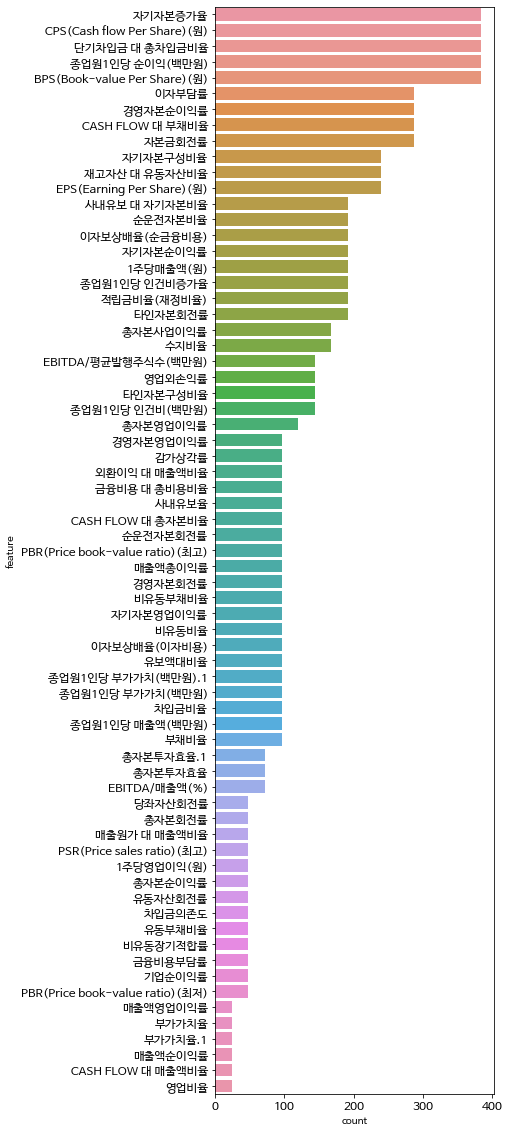

In [ ]:
for each_df in ['basic_final_df', 'diff_df','binning_final_df', 'small_business_df']:
    result = df[df['데이터프레임']== each_df]
    col_list = []
    for idx,col in result.iterrows():
        seleted_variables = re.sub("\[|\]|\'|\'|", "",col[7]).split(', ')
        col_list.extend(seleted_variables)
        
        result = Counter(col_list)

        result = pd.DataFrame.from_dict(result, orient='index').reset_index()
        result.rename(columns = {0:'count', 'index':'feature'}, inplace=True)
        result.sort_values(by='count', ascending=False, inplace=True)

    plt.figure(figsize=(5,20))
    plt.title(each_df)
    sns.barplot( data= result, x= "count", y= "feature")
    plt.show()

# top_92

In [ ]:
df.sort_values(by=['Recall', 'Accuracy'], ascending=[False, False],inplace=True)

In [ ]:
Recall_75_value = np.percentile(df['Recall'], [75], interpolation='lower')
target = df.loc[df['Recall']>=Recall_75_value[0]]

Accuracy_75_value = np.percentile(target['Accuracy'], [75], interpolation='lower')
target = target.loc[target['Accuracy']>=Accuracy_75_value[0]]

In [ ]:
target['데이터프레임'].value_counts()

small_business_df    36
basic_final_df       29
binning_final_df     17
diff_df              10
Name: 데이터프레임, dtype: int64

In [ ]:
target['적용모델'].value_counts()

lg     34
pr     28
rf     23
svm     4
knn     3
Name: 적용모델, dtype: int64

In [ ]:
target.to_csv('target_92.csv', index=False)

In [ ]:
target['train_test_split(Y/R)'].value_counts()

R    60
Y    32
Name: train_test_split(Y/R), dtype: int64

# 필요 X

In [ ]:
len( result_df[result_df['변수선택법']=='error'] )

336

In [ ]:
result_df = result_df[result_df['변수선택법']!='error']

In [ ]:
len(result_df)

1624

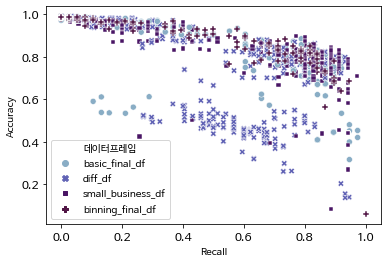

In [ ]:
sns.set_palette('twilight')
sns.scatterplot(x = 'Recall', y='Accuracy',hue='데이터프레임', style = '데이터프레임', data = result_df)

In [ ]:
Recall_top10_value = np.percentile(result_df['Recall'], [90], interpolation='lower')
Recall_top10_value[0]

0.868

(0.0, 1.0)

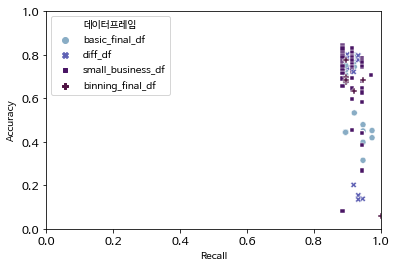

In [ ]:
Recall_top10 = result_df.loc[result_df['Recall']>Recall_top10_value[0]]
sns.set_palette('twilight')
sns.scatterplot(x = 'Recall', y='Accuracy',hue='데이터프레임', style = '데이터프레임', data = Recall_top10)
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
Accuracy_top10_value = np.percentile(Recall_top10['Accuracy'], [90], interpolation='lower')
Accuracy_top10_value[0]

0.799

(0.0, 1.0)

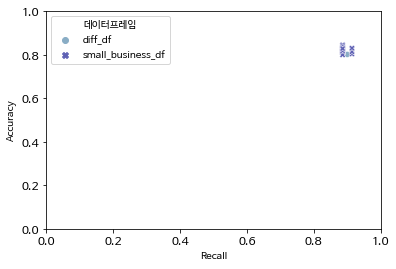

In [ ]:
Accuracy_top10 = Recall_top10.loc[Recall_top10['Accuracy']>Accuracy_top10_value[0]]
sns.set_palette('twilight')
sns.scatterplot(x = 'Recall', y='Accuracy',hue='데이터프레임', style = '데이터프레임',  data = Accuracy_top10)
plt.xlim(0,1)
plt.ylim(0,1)

(0.78, 0.9)

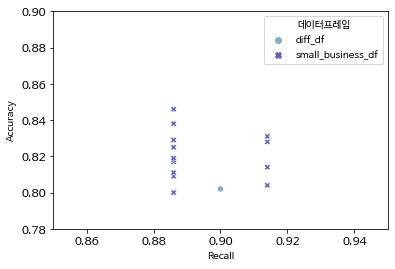

In [ ]:
sns.scatterplot(x = 'Recall', y='Accuracy',hue='데이터프레임', style = '데이터프레임',  data = Accuracy_top10)
plt.xlim(0.85,0.95)
plt.ylim(0.78,0.9)

In [ ]:
len( Accuracy_top10 )

16